## Colocation of model data with observations

This notebook gives an introduction into collocation of gridded data with observations. Here, the 550 nm AODs of the ECMWF CAMS reanalysis model are compared with global daily AeroNet Sun V2 (Level 2) data for the year 2010. The collocated data will be analysed and visualised in monthly resolution. The analysis results will be plotted in the form of the well known Aerocom loglog scatter plots as can be found in the online interface (see e.g. [here](http://aerocom.met.no/cgi-bin/aerocom/surfobs_annualrs.pl)).

### Import setup and imports

In [1]:
import pyaerocom as pya
pya.change_verbosity('critical')

YEAR = 2010
VAR = "od550aer"
TS_TYPE = "daily"
MODEL_ID = "ECMWF_CAMS_REAN"
OBS_ID = 'AeronetSunV3Lev2.daily'

Initating pyaerocom configuration


Checking database access...


Checking access to: /lustre/storeA


Access to lustre database: True


Init data paths for lustre


Expired time: 0.017 s


### Import of model data

Create reader instance for model data and print overview of what is in there.

In [2]:
model_reader = pya.io.ReadGridded(MODEL_ID)
print(model_reader)


Pyaerocom ReadGridded
---------------------
Data ID: ECMWF_CAMS_REAN
Data directory: /lustre/storeA/project/aerocom/aerocom-users-database/ECMWF/ECMWF_CAMS_REAN/renamed
Available experiments: ['', 'REAN']
Available years: [2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 9999]
Available frequencies ['daily' 'monthly']
Available variables: ['ang4487aer', 'bscatc532aerboa', 'bscatc532aertoa', 'ec532aer', 'ec532dryaer', 'od440aer', 'od550aer', 'od550bc', 'od550dust', 'od550oa', 'od550so4', 'od550ss', 'od865aer', 'sconcbc', 'sconcdust', 'sconcoa', 'sconcpm10', 'sconcpm25', 'sconcso4', 'sconcss', 'time', 'z']


Since we are only interested in a single year we can use the method

In [3]:
model_data = model_reader.read_var(VAR, start=YEAR)
#model_data = read_result[VAR][YEAR]
print(model_data)

pyaerocom.GriddedData: ECMWF_CAMS_REAN
Grid data: Aerosol optical depth at 550 nm / (1) (time: 365; latitude: 161; longitude: 320)
     Dimension coordinates:
          time                             x              -               -
          latitude                         -              x               -
          longitude                        -              -               x
     Attributes:
          Conventions: CF-1.6
          NCO: "4.5.4"
          computed: False
          concatenated: False
          data_id: ECMWF_CAMS_REAN
          from_files: ['/lustre/storeA/project/aerocom/aerocom-users-database/ECMWF/ECMWF_CA...
          history: Sat May 26 21:08:48 2018: ncecat -O -u time -n 365,3,1 CAMS_REAN_001.nc...
          nco_openmp_thread_number: 1
          outliers_removed: False
          reader: None
          region: None
          regridded: False
          ts_type: daily
          var_name_read: n/d
     Cell methods:
          mean: step
          mean: time


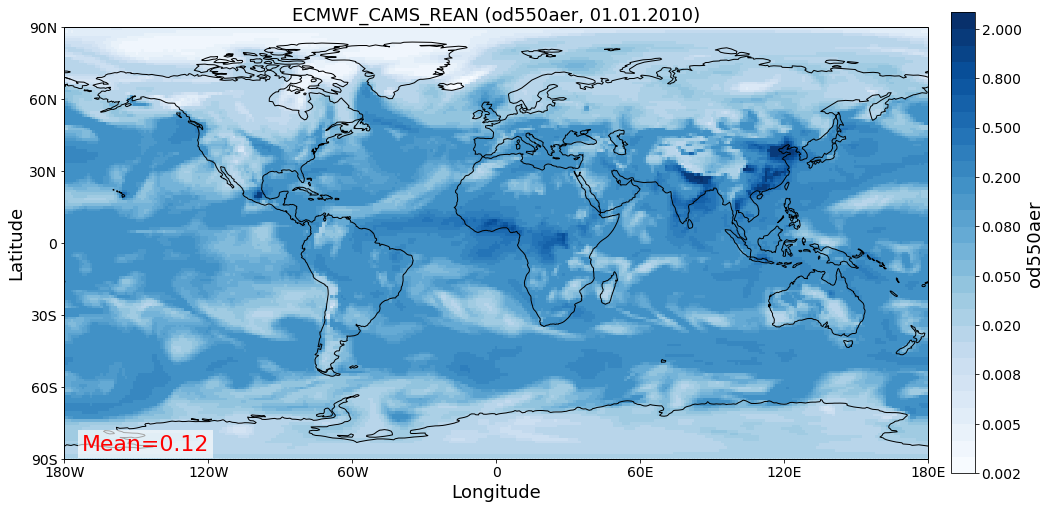

In [4]:
fig = model_data.quickplot_map(time_idx=0)

### Import of AeroNet Sun V3 data (Level 2)

Import Aeronet data and apply filter that selects only stations that are located at altitudes between 0 and 1000 m.

In [5]:
obs_reader = pya.io.ReadUngridded(OBS_ID, [VAR, 'ang4487aer'])
obs_data = obs_reader.read().filter_by_meta(altitude=[0, 1000])
print(obs_data)


Pyaerocom UngriddedData
-----------------------
Contains networks: ['AeronetSunV3Lev2.daily']
Contains variables: ['od550aer', 'ang4487aer']
Contains instruments: ['sun_photometer']
Total no. of meta-blocks: 2068
Filters that were applied:
 Filter time log: 20191002122003
	Created od550aer single var object from multivar UngriddedData instance
 Filter time log: 20191002122002
	Created ang4487aer single var object from multivar UngriddedData instance
 Filter time log: 20191003180122
	altitude: [0, 1000]


#### Plot station coordinates

First, plot all stations that are available at all times (as red dots), then (on top of that in green), plot all stations that provide AODs in 2010.

Input filters {'longitude': [-180, 180], 'latitude': [-90, 90], 'altitude': [-1000000.0, 1000.0]} result in unchanged data object


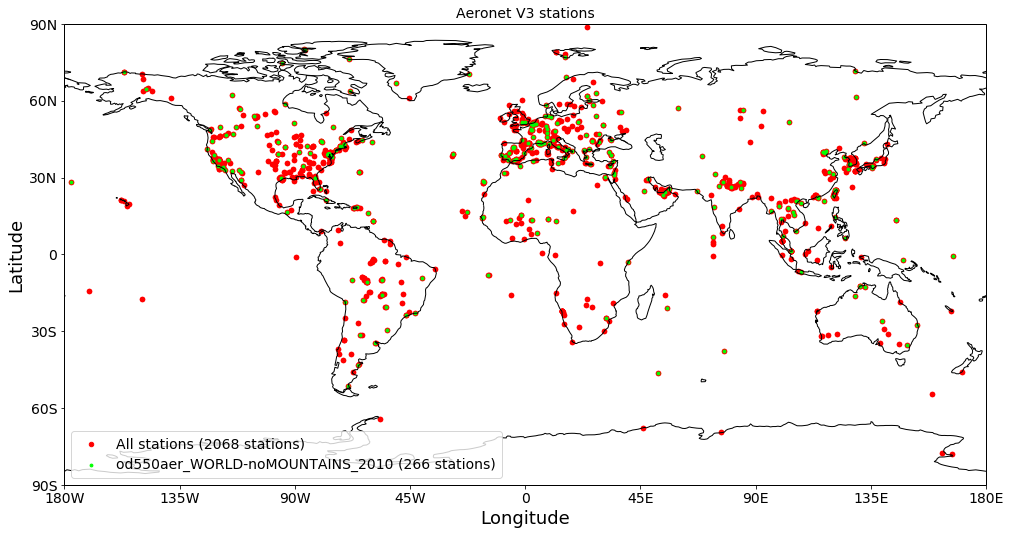

In [6]:
ax = obs_data.plot_station_coordinates(color='r', markersize=20,
                                       label='All stations')
ax = obs_data.plot_station_coordinates(var_name='od550aer', start=2010, 
                                       filter_name='WORLD-noMOUNTAINS',
                                       color='lime', markersize=8, legend=True,
                                       title='Aeronet V3 stations',
                                       ax=ax) #just pass the GeoAxes instance that was created in the first call

### Perform colocation and plot corresponding scatter plots with statistical values

#### 2010 monthly World no mountains

Colocate 2010 data in monthly resolution using (cf. green dots in station plot above).

In [7]:
obs_data

UngriddedData <networks: ['AeronetSunV3Lev2.daily']; vars: ['od550aer', 'ang4487aer']; instruments: ['sun_photometer'];No. of stations: 2068

In [8]:
data_coloc = pya.colocation.colocate_gridded_ungridded(model_data, obs_data, ts_type='monthly',
                                                       filter_name='WORLD-noMOUNTAINS')
data_coloc

Input filters {'longitude': [-180, 180], 'latitude': [-90, 90], 'altitude': [-1000000.0, 1000.0]} result in unchanged data object


Setting od550aer outlier lower lim: -1.00


Setting od550aer outlier upper lim: 10.00


Interpolating data of shape (12, 161, 320). This may take a while.


Successfully interpolated cube


<xarray.DataArray 'od550aer' (data_source: 2, time: 12, station_name: 252)>
array([[[     nan, 0.117588, ...,      nan, 0.222138],
        [     nan, 0.132128, ...,      nan, 0.429762],
        ...,
        [0.132236, 0.195057, ...,      nan, 0.261765],
        [     nan,      nan, ...,      nan, 0.37905 ]],

       [[0.189948, 0.140062, ..., 0.016372, 0.204337],
        [0.150408, 0.190089, ..., 0.035838, 0.257806],
        ...,
        [0.159844, 0.178564, ..., 0.022606, 0.239393],
        [0.147172, 0.138039, ..., 0.015231, 0.19986 ]]])
Coordinates:
  * data_source   (data_source) <U22 'AeronetSunV3Lev2.daily' 'ECMWF_CAMS_REAN'
    var_name      (data_source) <U8 'od550aer' 'od550aer'
    var_units     (data_source) <U1 '1' '1'
    ts_type_src   (data_source) <U5 'daily' 'daily'
  * time          (time) datetime64[ns] 2010-01-01 2010-02-01 ... 2010-12-01
  * station_name  (station_name) <U19 'ARM_Darwin' ... 'Zinder_Airport'
    latitude      (station_name) float64 -12.43 37.97 15.3

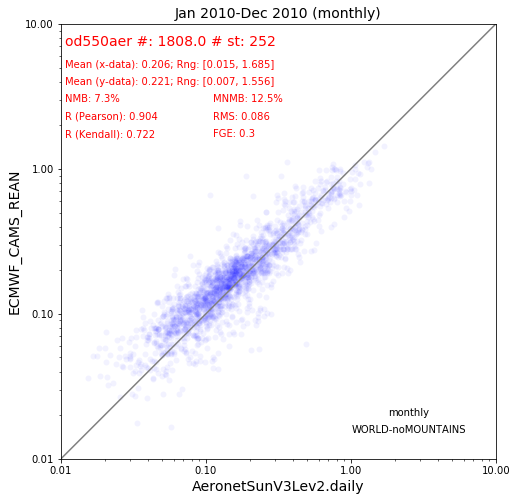

In [9]:
data_coloc.plot_scatter(marker='o', mec='none', color='b', alpha=0.05);

#### Time colocation

The above colocation was performed based on monthly means, both from model and obs, at each station. However, if you look closely in the output you can see that both datasets are provided in daily resolution. You may colocate on a daily basis using the input argument `colocate_time`, in which case the model monthly means correspond to the mean value from the days where there were observations. This can (and most likely will) give you different results, since the observations may miss some days in the month, which is disregarded in the above monthly colocation routine:

In [10]:
data_coloc_alt = pya.colocation.colocate_gridded_ungridded(model_data, obs_data, ts_type='monthly',
                                                           filter_name='WORLD-noMOUNTAINS',
                                                           colocate_time=True)

Input filters {'longitude': [-180, 180], 'latitude': [-90, 90], 'altitude': [-1000000.0, 1000.0]} result in unchanged data object


Setting od550aer outlier lower lim: -1.00


Setting od550aer outlier upper lim: 10.00


Interpolating data of shape (365, 161, 320). This may take a while.


Successfully interpolated cube


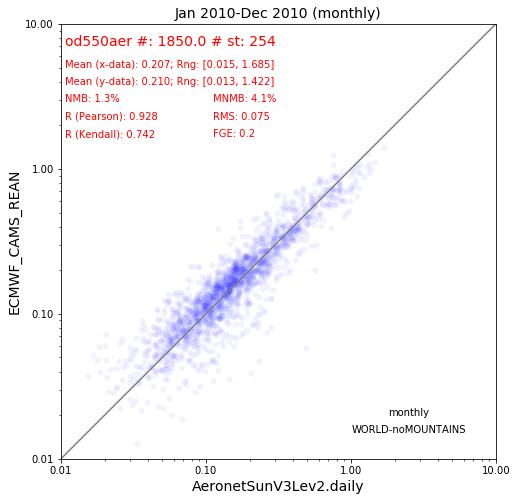

In [11]:
data_coloc_alt.plot_scatter(marker='o', mec='none', color='b', alpha=0.05);

The result shows, that time colocation yields better results, with lower biases (NMB and MNMB) and higher correlation, etc. 

However, in reality and in particular in large model intercomparison studies (involving many variables and model outputs) the model diagnostics output files are submitted in monthly resolution, which does not allow to perform these time colocation on a daily basis. 

Note also, that the model data used here is the CAMS reanalysis dataset which assimilates AERONET AODs. It is therefore not surprising, that the results look so shiny.

#### 2010 daily Europe no mountains

Now perform colocation only over Europe. Starting with a station plot.

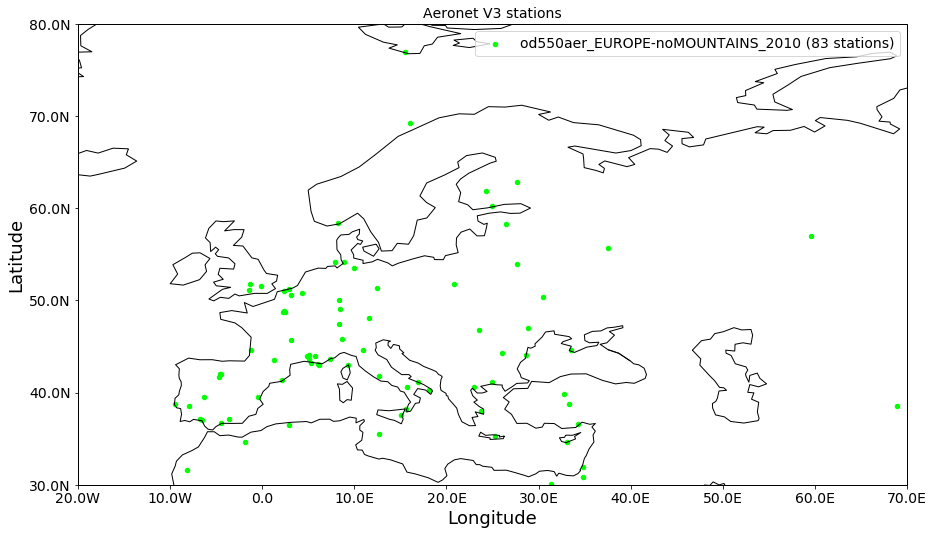

In [12]:
obs_data.plot_station_coordinates(var_name='od550aer', start=2010, 
                                  filter_name='EUROPE-noMOUNTAINS',
                                  color='lime', markersize=20, legend=True,
                                  title='Aeronet V3 stations');

In [13]:
data_coloc_eur = pya.colocation.colocate_gridded_ungridded(model_data, obs_data, ts_type='daily',
                                                       filter_name='EUROPE-noMOUNTAINS')
data_coloc_eur

Setting od550aer outlier lower lim: -1.00


Setting od550aer outlier upper lim: 10.00


Interpolating data of shape (365, 161, 320). This may take a while.


Successfully interpolated cube


<xarray.DataArray 'od550aer' (data_source: 2, time: 365, station_name: 83)>
array([[[     nan,      nan, ...,      nan,      nan],
        [0.078648,      nan, ...,      nan,      nan],
        ...,
        [     nan,      nan, ...,      nan,      nan],
        [     nan,      nan, ...,      nan,      nan]],

       [[0.086522, 0.015151, ..., 0.075447, 0.03005 ],
        [0.067198, 0.043074, ..., 0.103671, 0.042999],
        ...,
        [0.242585, 0.186407, ..., 0.053797, 0.011344],
        [0.079498, 0.122098, ..., 0.027066, 0.019639]]])
Coordinates:
  * data_source   (data_source) <U22 'AeronetSunV3Lev2.daily' 'ECMWF_CAMS_REAN'
    var_name      (data_source) <U8 'od550aer' 'od550aer'
    var_units     (data_source) <U1 '1' '1'
    ts_type_src   (data_source) <U5 'daily' 'daily'
  * time          (time) datetime64[ns] 2010-01-01 2010-01-02 ... 2010-12-31
  * station_name  (station_name) <U19 'ATHENS-NOA' 'Andenes' ... 'Yekaterinburg'
    latitude      (station_name) float64 37.97 69

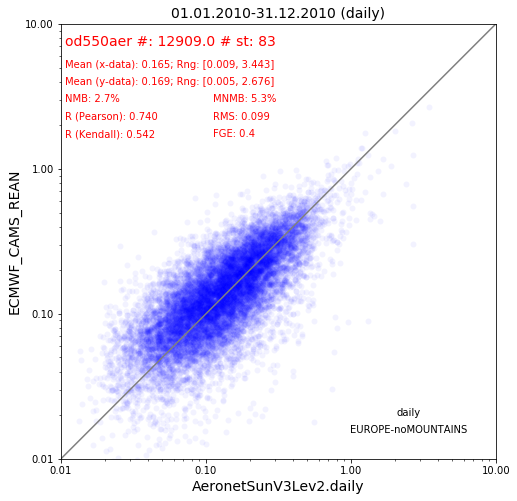

In [14]:
data_coloc_eur.plot_scatter(marker='o', mec='none', color='b', alpha=0.05);

### Satellite colocation

Below, the same is done for satellite colocation using AODs from the MODIS instrument onboard the Aqua satellite (Collection 6).

In [15]:
pya.browse_database('MODIS6*aqua')


Pyaerocom ReadGridded
---------------------
Data ID: MODIS6.aqua
Data directory: /lustre/storeA/project/aerocom/aerocom-users-database/SATELLITE-DATA/MODIS6.aqua/renamed
Available experiments: ['MODIS6.aqua']
Available years: [2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014]
Available frequencies ['daily']
Available variables: ['od550aer']


In [16]:
modis_aods = pya.io.ReadGridded('MODIS6.aqua').read_var('od550aer', start=2010)
modis_aods

Overwriting unit unknown in cube od550aer with value "1"


pyaerocom.GriddedData
Grid data: <iris 'Cube' of Aerosol Optical Thickness at 0.55 microns for both Ocean (best) and Land (corrected): Mean / (1) (time: 365; latitude: 180; longitude: 360)>

Now the satellite data comes gridded, like the model data. Thus, we use the gridded / gridded colocation routine rather than the gridded / ungridded that we used above when using AERONET station data.

#### No (daily) time colocation

In [17]:
coldata_modis =  pya.colocation.colocate_gridded_gridded(model_data,
                                                         modis_aods, 
                                                         ts_type='monthly',
                                                         regrid_res_deg=5,
                                                         remove_outliers=True,
                                                         colocate_time=False)

Interpolating data of shape (365, 180, 360). This may take a while.


Successfully interpolated cube


Setting od550aer outlier lower lim: -1.00


Setting od550aer outlier upper lim: 10.00


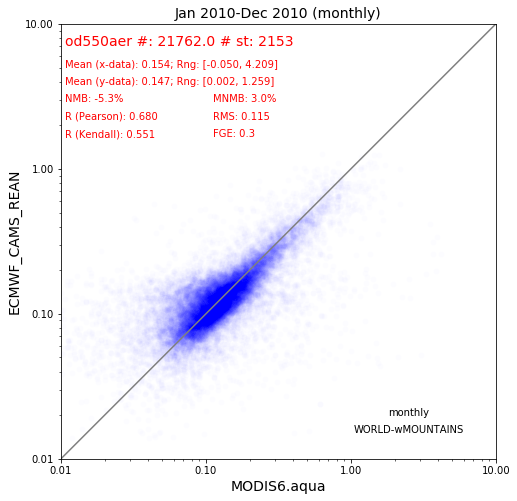

In [18]:
coldata_modis.plot_scatter(marker='o', mec='none', color='b', alpha=0.01);

#### With (daily) time colocation

In [19]:
coldata_modis_alt =  pya.colocation.colocate_gridded_gridded(model_data,
                                                         modis_aods, 
                                                         ts_type='monthly',
                                                         regrid_res_deg=5,
                                                         remove_outliers=True,
                                                         colocate_time=True)

Interpolating data of shape (365, 180, 360). This may take a while.


Successfully interpolated cube


Setting od550aer outlier lower lim: -1.00


Setting od550aer outlier upper lim: 10.00


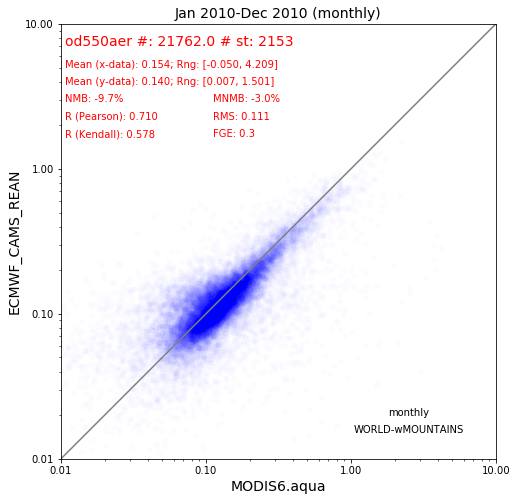

In [20]:
coldata_modis_alt.plot_scatter(marker='o', mec='none', color='b', alpha=0.01);